### Importação dos dados



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [10]:
# prompt: calcule o faturamento total de cada loja: some os valores da coluna preço de cada loja estimando o faturamento.

faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

print(f"Faturamento total da Loja 1: R$ {faturamento_loja1:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
print(f"Faturamento total da Loja 2: R$ {faturamento_loja2:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
print(f"Faturamento total da Loja 3: R$ {faturamento_loja3:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
print(f"Faturamento total da Loja 4: R$ {faturamento_loja4:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))

Faturamento total da Loja 1: R$ 1.534.509,12
Faturamento total da Loja 2: R$ 1.488.459,06
Faturamento total da Loja 3: R$ 1.464.025,03
Faturamento total da Loja 4: R$ 1.384.497,58


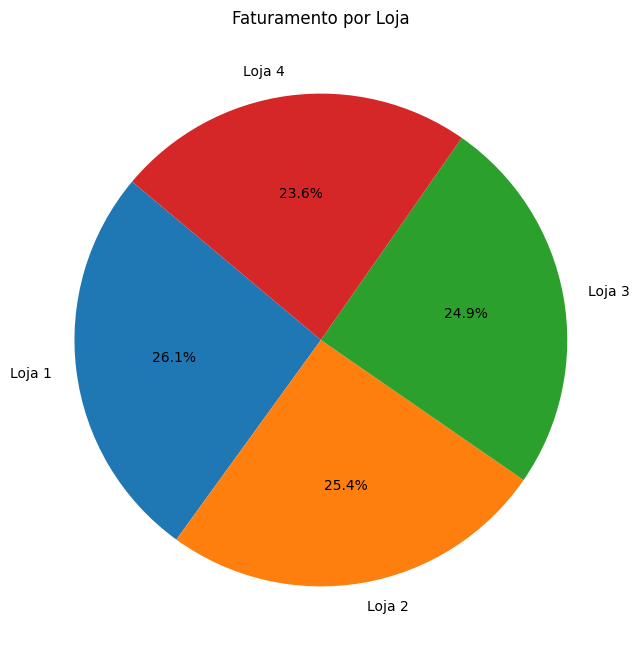

In [11]:
# prompt: Gere um gráfico de pizza que demonstre o faturamento de cada loja

import matplotlib.pyplot as plt
import numpy as np
faturamentos = np.array([faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4])
labels = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
plt.figure(figsize=(8, 8))
plt.pie(faturamentos, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Faturamento por Loja')
plt.show()


# 2. Vendas por Categoria


In [ ]:
# prompt: Calcule a quantidade de produtos vendidos por categoria em cada loja. agrupe os dados por categoria e conte o numero de vendas de cada tipo, mostre as categorias mais populares de cada loja.

# Função para calcular a quantidade de produtos vendidos por categoria em uma loja
def analise_vendas_categoria(df, nome_da_loja):
  categoria_vendida = df['Categoria do Produto'].value_counts()
  print(f"\nQuantidade de produtos vendidos por categoria na {nome_da_loja}:")
  print(categoria_vendida)
  print(f"\nCategoria mais popular na {nome_da_loja}: {categoria_vendida.idxmax()} ({categoria_vendida.max()} vendas)")

# Analisar vendas por categoria em cada loja
analise_vendas_categoria(loja, "Loja 1")
analise_vendas_categoria(loja2, "Loja 2")
analise_vendas_categoria(loja3, "Loja 3")
analise_vendas_categoria(loja4, "Loja 4")


Quantidade de produtos vendidos por categoria na Loja 1:
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64

Categoria mais popular na Loja 1: moveis (465 vendas)

Quantidade de produtos vendidos por categoria na Loja 2:
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64

Categoria mais popular na Loja 2: moveis (442 vendas)

Quantidade de produtos vendidos por categoria na Loja 3:
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer      

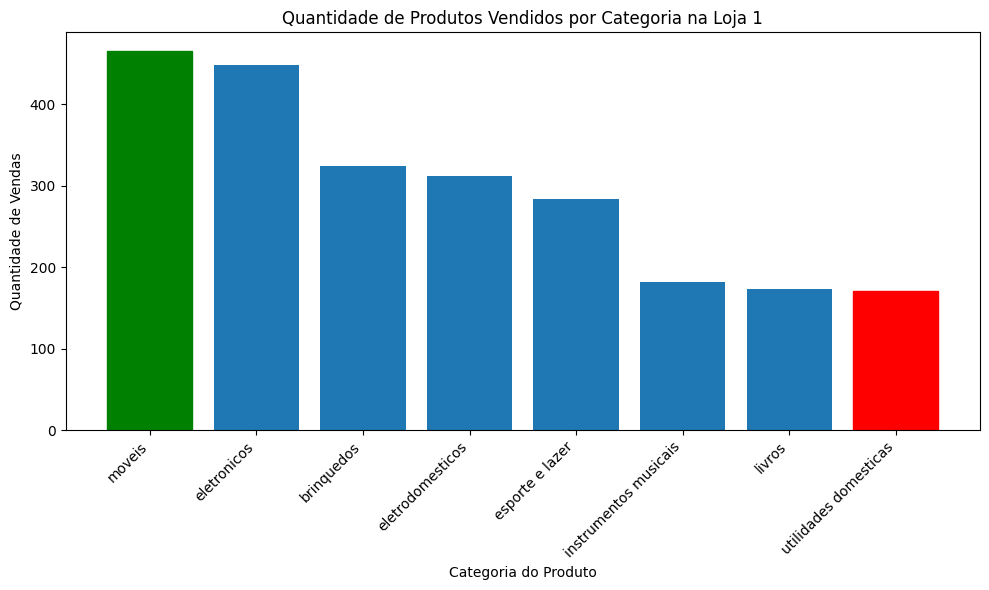

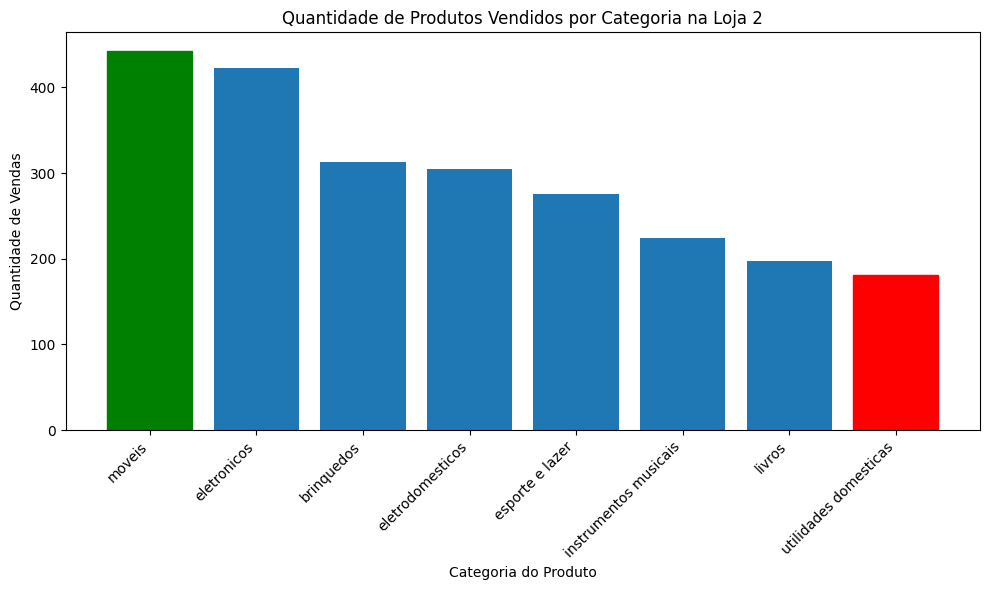

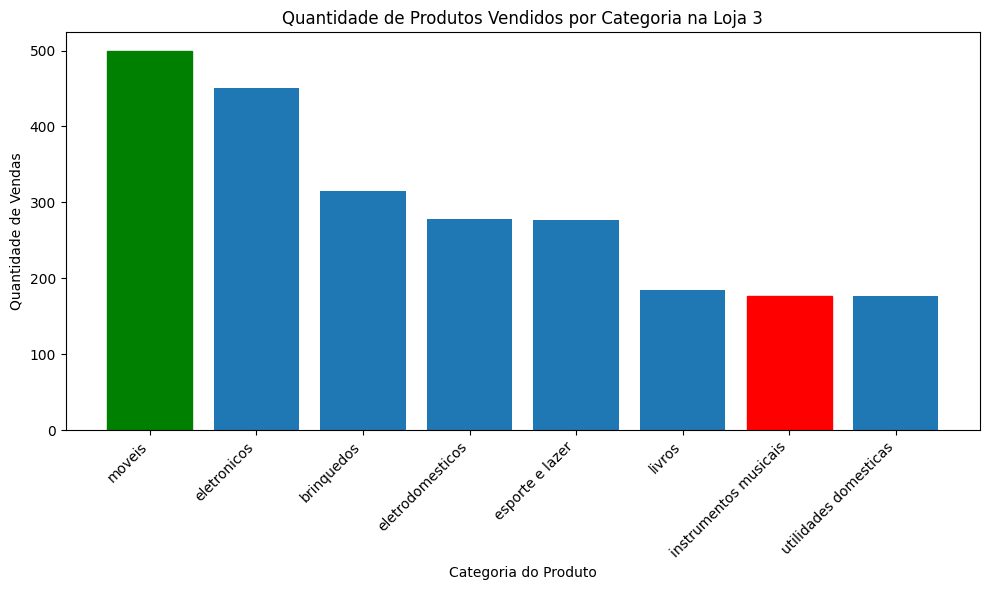

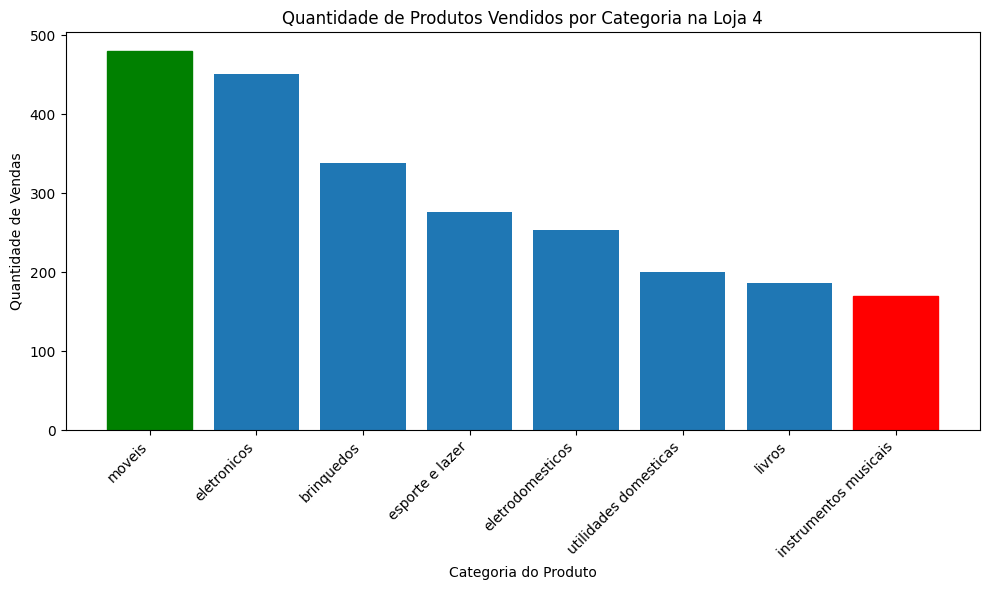

In [ ]:
# prompt: Fazer um gráfico de barras, individual para cada loja, deve mostrar no gráfico a melhor e a pior categoria por loja para:
# 1 - Quantidade de produtos vendidos por categoria na loja 1
# 2 - Quantidade de produtos vendidos por categoria na loja 2
# 3 - Quantidade de produtos vendidos por categoria na loja 3
# 4 - Quantidade de produtos vendidos por categoria na loja 4

def graficobarra_vendas_categoria(df, nome_da_loja):
    vendas_categoria = df['Categoria do Produto'].value_counts()

    plt.figure(figsize=(10, 6))
    bars = plt.bar(vendas_categoria.index, vendas_categoria.values)
    plt.title(f'Quantidade de Produtos Vendidos por Categoria na {nome_da_loja}')
    plt.xlabel('Categoria do Produto')
    plt.ylabel('Quantidade de Vendas')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Destacar a melhor e pior categoria
    melhor_categoria = vendas_categoria.idxmax()
    pior_categoria = vendas_categoria.idxmin()

    for i, categoria in enumerate(vendas_categoria.index):
        if categoria == melhor_categoria:
            bars[i].set_color('green') # Melhor categoria em verde
        elif categoria == pior_categoria:
            bars[i].set_color('red')   # Pior categoria em vermelho

    plt.show()

# Gerar gráficos para cada loja
graficobarra_vendas_categoria(loja, "Loja 1")
graficobarra_vendas_categoria(loja2, "Loja 2")
graficobarra_vendas_categoria(loja3, "Loja 3")
graficobarra_vendas_categoria(loja4, "Loja 4")

# 3. Média de Avaliação das Lojas

In [ ]:
# prompt: calcule a média de avaliação das lojas. usando o campo: Avaliação da compra para cada loja, inclua a avaliação individual de cada vendedor por loja, use o campo Vendedor

# Função para calcular a média de avaliação geral da loja e por vendedor
def analise_notas(df, nome_da_loja):
  media_nota_loja = df['Avaliação da compra'].mean()
  print(f"\nMédia de avaliação geral da {nome_da_loja}: {media_nota_loja:.2f}")

  media_nota_vendedor = df.groupby('Vendedor')['Avaliação da compra'].mean()
  print(f"Média de avaliação por vendedor na {nome_da_loja}:")
  print(round(media_nota_vendedor,2))

# Analisar avaliações em cada loja
analise_notas(loja, "Loja 1")
analise_notas(loja2, "Loja 2")
analise_notas(loja3, "Loja 3")
analise_notas(loja4, "Loja 4")


Média de avaliação geral da Loja 1: 3.98
Média de avaliação por vendedor na Loja 1:
Vendedor
Beatriz Moraes      4.02
Bianca Santos       3.99
Bruno Rodrigues     4.25
Camila Ribeiro      3.95
Felipe Santos       4.04
Isabella Pereira    4.06
João Souza          3.85
Juliana Costa       3.98
Larissa Alves       3.88
Lucas Oliveira      3.93
Mariana Ferreira    4.00
Pedro Gomes         3.94
Rafael Costa        4.07
Thiago Silva        3.75
Name: Avaliação da compra, dtype: float64

Média de avaliação geral da Loja 2: 4.04
Média de avaliação por vendedor na Loja 2:
Vendedor
Beatriz Moraes      3.95
Bianca Santos       3.93
Bruno Rodrigues     4.07
Camila Ribeiro      4.14
Felipe Santos       4.11
Isabella Pereira    3.94
João Souza          4.06
Juliana Costa       3.94
Larissa Alves       4.08
Lucas Oliveira      3.95
Mariana Ferreira    4.19
Pedro Gomes         4.17
Rafael Costa        4.01
Thiago Silva        4.00
Name: Avaliação da compra, dtype: float64

Média de avaliação geral da

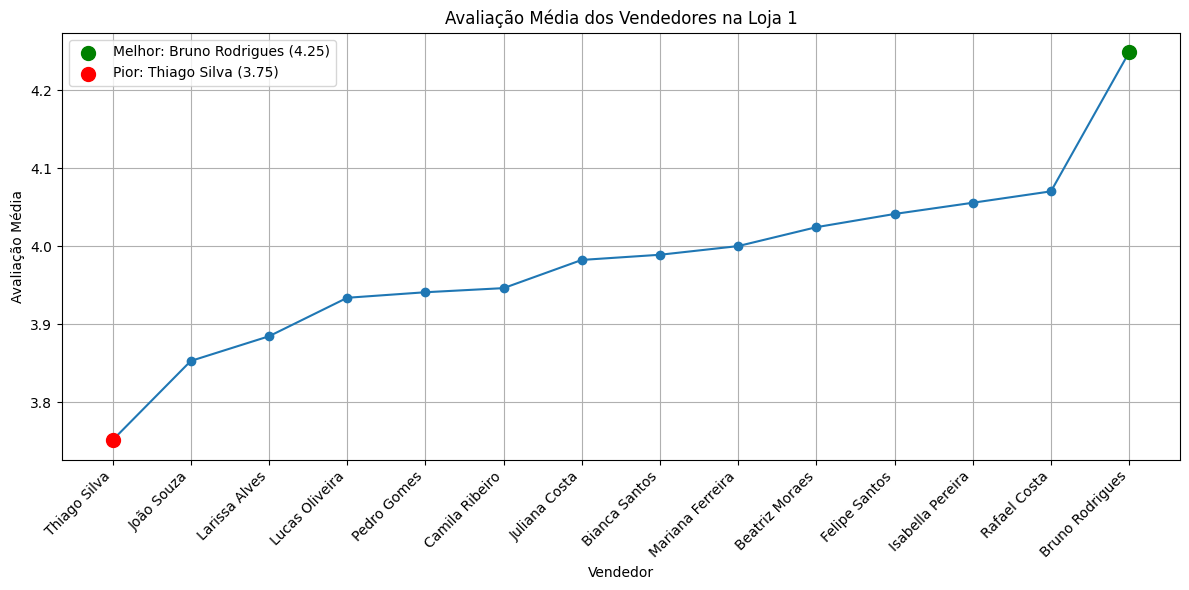

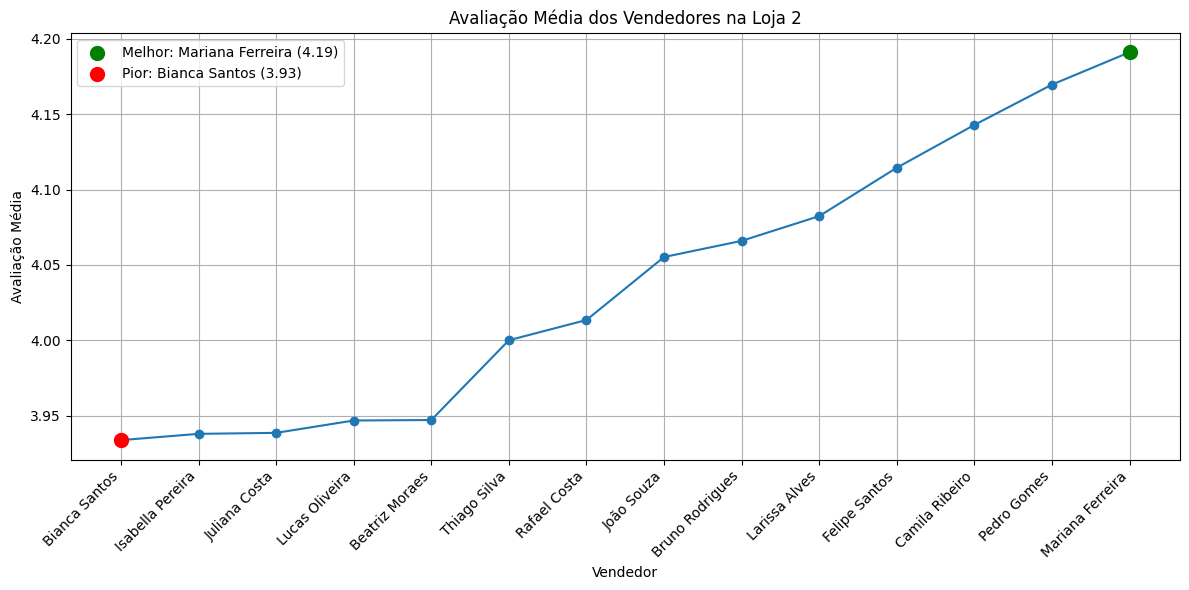

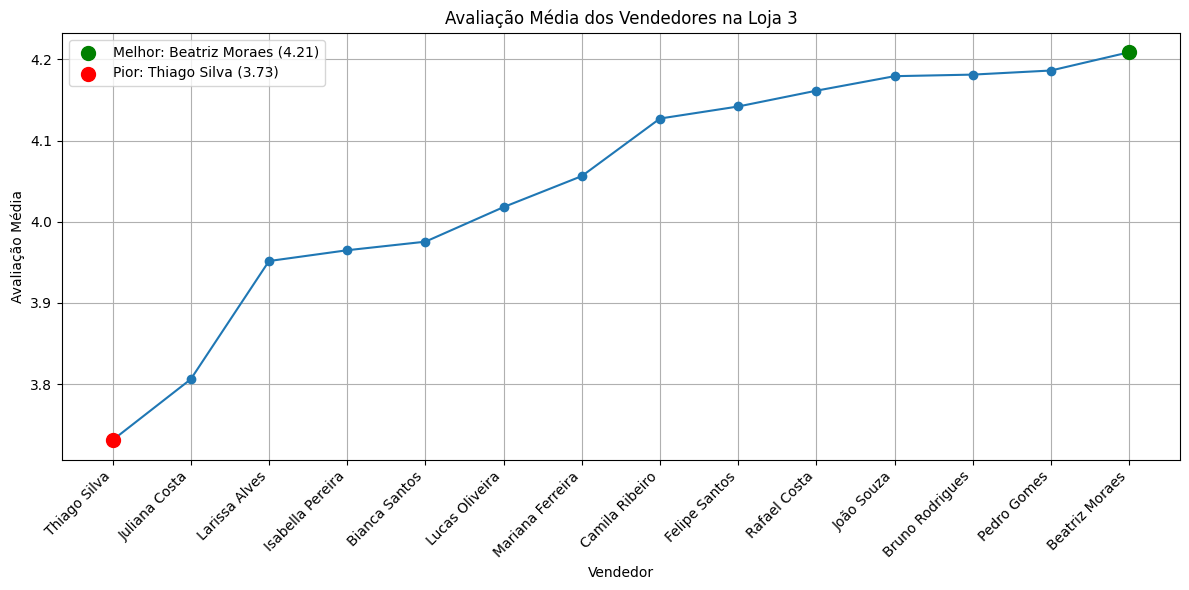

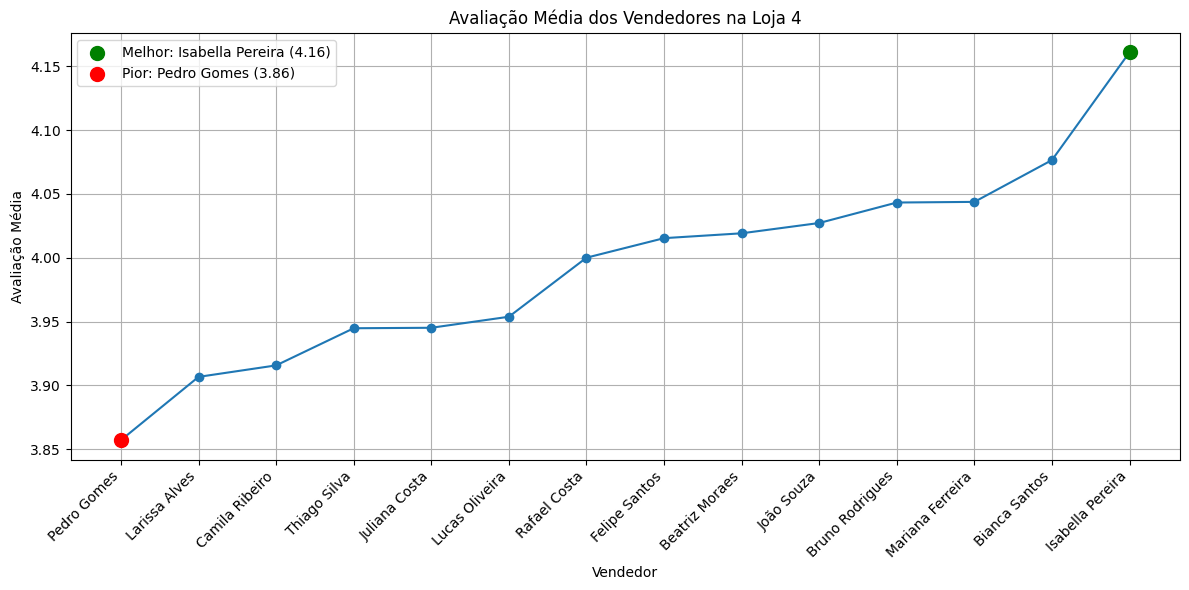

In [ ]:
# prompt: use grafico em linha e mostre a avaliação média dos clientes, individualize por loja, identifique o vendedor melhor e pior avaliado por loja

def avaliacao_de_vendedores(df, nome_da_loja):
    notas_vendedor = df.groupby('Vendedor')['Avaliação da compra'].mean().sort_values()

    plt.figure(figsize=(12, 6))
    plt.plot(notas_vendedor.index, notas_vendedor.values, marker='o', linestyle='-')
    plt.title(f'Avaliação Média dos Vendedores na {nome_da_loja}')
    plt.xlabel('Vendedor')
    plt.ylabel('Avaliação Média')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()

    # Identificar o melhor e pior vendedor
    melhor_vendedor = notas_vendedor.idxmax()
    pior_vendedor = notas_vendedor.idxmin()

    plt.scatter(melhor_vendedor, notas_vendedor[melhor_vendedor], color='green', s=100, zorder=5, label=f'Melhor: {melhor_vendedor} ({notas_vendedor[melhor_vendedor]:.2f})')
    plt.scatter(pior_vendedor, notas_vendedor[pior_vendedor], color='red', s=100, zorder=5, label=f'Pior: {pior_vendedor} ({notas_vendedor[pior_vendedor]:.2f})')

    plt.legend()
    plt.show()

# Gerar gráficos de avaliação por vendedor para cada loja
avaliacao_de_vendedores(loja, "Loja 1")
avaliacao_de_vendedores(loja2, "Loja 2")
avaliacao_de_vendedores(loja3, "Loja 3")
avaliacao_de_vendedores(loja4, "Loja 4")


# 4. Produtos Mais e Menos Vendidos

In [7]:
# prompt: Identifique os produtos mais vendidos e menos vendidos por categoria e por loja, por vendedor e por loja. use os campos: Produtoo, Categoria do Produto, Preço, Vendedor

# Concatena os dataframes de todas as lojas
todas_lojas = pd.concat([loja.assign(Loja='Loja 1'),
                         loja2.assign(Loja='Loja 2'),
                         loja3.assign(Loja='Loja 3'),
                         loja4.assign(Loja='Loja 4')])

# Produtos mais e menos vendidos por categoria e por loja
print("\nProdutos mais e menos vendidos por categoria e por loja:")
produtos_por_categoria_loja = todas_lojas.groupby(['Loja', 'Categoria do Produto', 'Produto']).size().reset_index(name='Quantidade')

for loja_nome in todas_lojas['Loja'].unique():
    df_loja = produtos_por_categoria_loja[produtos_por_categoria_loja['Loja'] == loja_nome]
    print(f"\n--- {loja_nome} ---")
    for categoria in df_loja['Categoria do Produto'].unique():
        df_categoria = df_loja[df_loja['Categoria do Produto'] == categoria]
        produto_mais_vendido = df_categoria.loc[df_categoria['Quantidade'].idxmax()]
        produto_menos_vendido = df_categoria.loc[df_categoria['Quantidade'].idxmin()]
        print(f"  Categoria: {categoria}")
        print(f"    Mais vendido: {produto_mais_vendido['Produto']} ({produto_mais_vendido['Quantidade']} vendas)")
        print(f"    Menos vendido: {produto_menos_vendido['Produto']} ({produto_menos_vendido['Quantidade']} vendas)")

# Produtos mais e menos vendidos por vendedor e por loja
print("\nProdutos mais e menos vendidos por vendedor e por loja:")
produtos_por_vendedor_loja = todas_lojas.groupby(['Loja', 'Vendedor', 'Produto']).size().reset_index(name='Quantidade')

for loja_nome in todas_lojas['Loja'].unique():
    df_loja = produtos_por_vendedor_loja[produtos_por_vendedor_loja['Loja'] == loja_nome]
    print(f"\n--- {loja_nome} ---")
    for vendedor in df_loja['Vendedor'].unique():
        df_vendedor = df_loja[df_loja['Vendedor'] == vendedor]
        if not df_vendedor.empty:
            produto_mais_vendido = df_vendedor.loc[df_vendedor['Quantidade'].idxmax()]
            produto_menos_vendido = df_vendedor.loc[df_vendedor['Quantidade'].idxmin()]
            print(f"  Vendedor: {vendedor}")
            print(f"    Mais vendido: {produto_mais_vendido['Produto']} ({produto_mais_vendido['Quantidade']} vendas)")
            print(f"    Menos vendido: {produto_menos_vendido['Produto']} ({produto_menos_vendido['Quantidade']} vendas)")
        else:
            print(f"  Vendedor: {vendedor} - Sem vendas registradas.")


Produtos mais e menos vendidos por categoria e por loja:

--- Loja 1 ---
  Categoria: brinquedos
    Mais vendido: Blocos de montar (56 vendas)
    Menos vendido: Boneca bebê (40 vendas)
  Categoria: eletrodomesticos
    Mais vendido: Micro-ondas (60 vendas)
    Menos vendido: Fogão (45 vendas)
  Categoria: eletronicos
    Mais vendido: TV Led UHD 4K (60 vendas)
    Menos vendido: Celular ABXY (33 vendas)
  Categoria: esporte e lazer
    Mais vendido: Bola de basquete (55 vendas)
    Menos vendido: Mochila (39 vendas)
  Categoria: instrumentos musicais
    Mais vendido: Bateria (53 vendas)
    Menos vendido: Pandeiro (36 vendas)
  Categoria: livros
    Mais vendido: Modelagem preditiva (51 vendas)
    Menos vendido: Ciência de dados com python (39 vendas)
  Categoria: moveis
    Mais vendido: Guarda roupas (60 vendas)
    Menos vendido: Mesa de jantar (40 vendas)
  Categoria: utilidades domesticas
    Mais vendido: Faqueiro (52 vendas)
    Menos vendido: Panela de pressão (35 vendas)


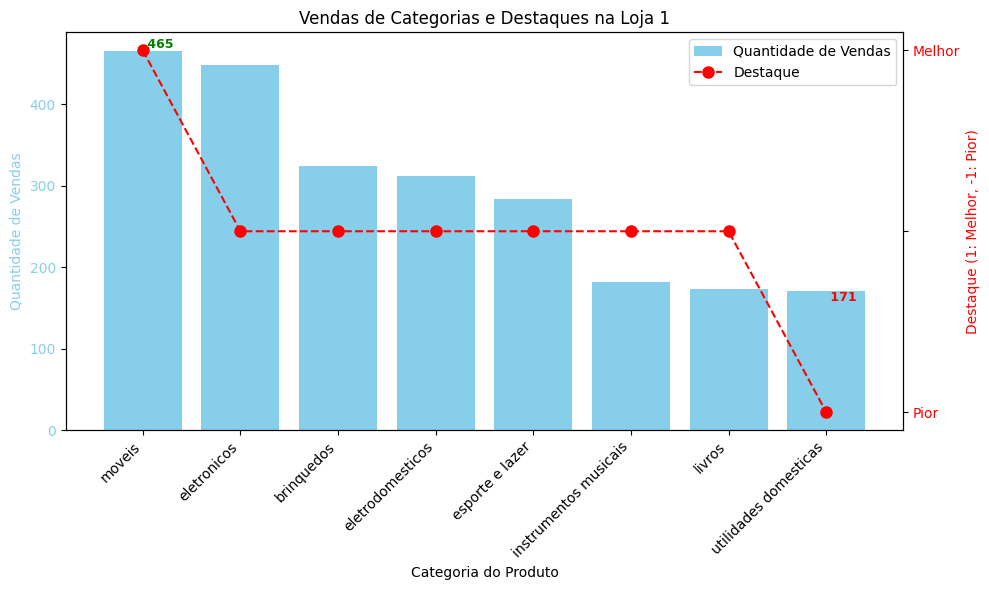

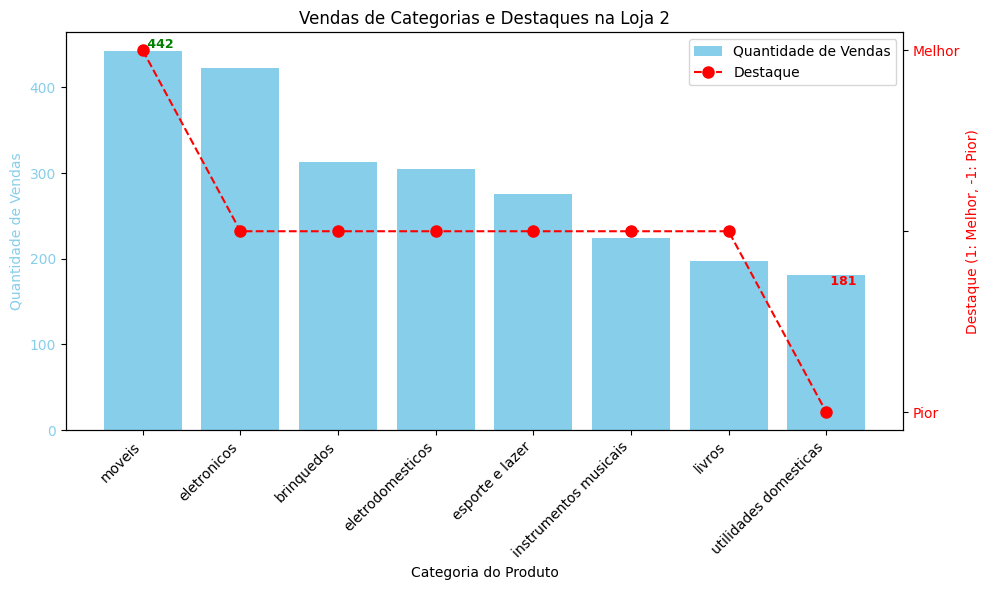

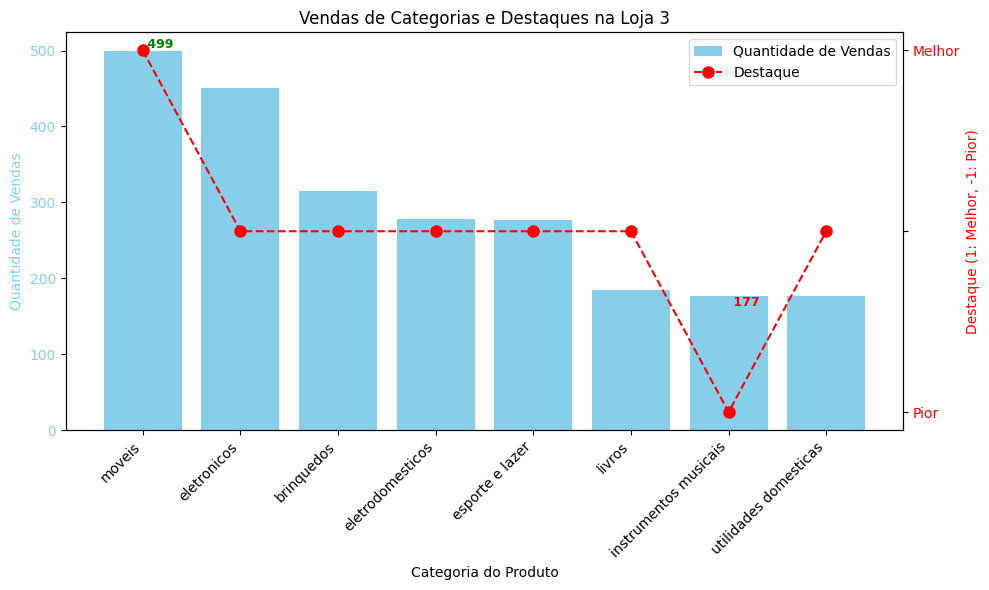

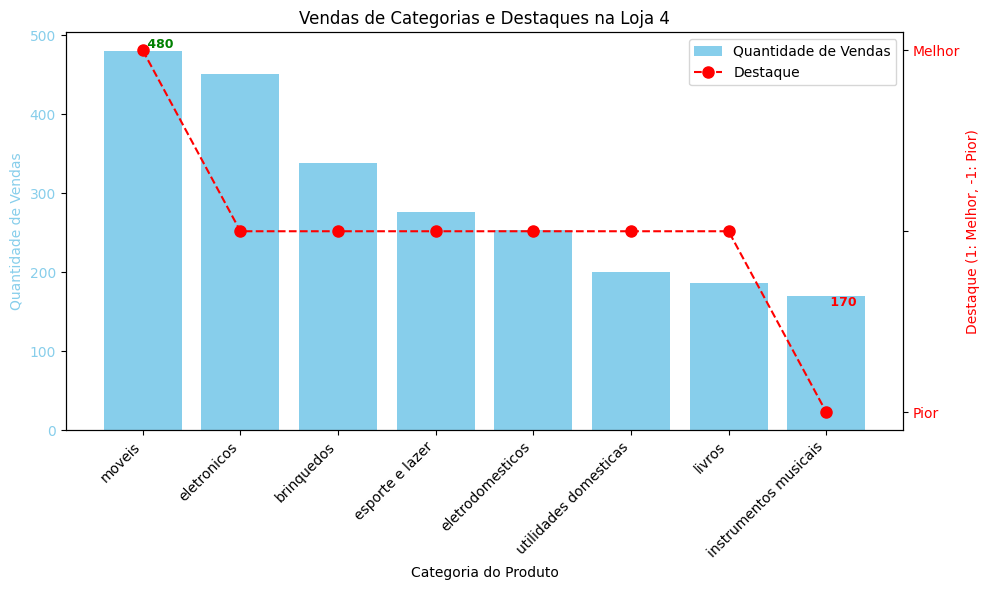

In [13]:
# prompt: Gere gráfico de coluna-linha, demonstrando a categoria que mais vende e a categoria que menos vende, por loja.

# Função para criar o gráfico de coluna-linha
def grafico_coluna_linha_categoria(df, nome_da_loja):
    vendas_categoria = df['Categoria do Produto'].value_counts()

    # Criar o gráfico de barras
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.bar(vendas_categoria.index, vendas_categoria.values, color='skyblue', label='Quantidade de Vendas')
    ax1.set_xlabel('Categoria do Produto')
    ax1.set_ylabel('Quantidade de Vendas', color='skyblue')
    ax1.tick_params(axis='y', labelcolor='skyblue')
    ax1.set_title(f'Vendas de Categorias e Destaques na {nome_da_loja}')
    ax1.set_xticks(range(len(vendas_categoria.index)))  # Set ticks first
    ax1.set_xticklabels(vendas_categoria.index, rotation=45, ha='right')

    # Identificar a categoria mais e menos vendida
    melhor_categoria = vendas_categoria.idxmax()
    pior_categoria = vendas_categoria.idxmin()

    # Criar um segundo eixo y para os destaques (linha)
    ax2 = ax1.twinx()
    # Criamos uma lista para plotar no segundo eixo, com 1 para a melhor e -1 para a pior
    destaques = [1 if cat == melhor_categoria else (-1 if cat == pior_categoria else 0) for cat in vendas_categoria.index]
    ax2.plot(vendas_categoria.index, destaques, color='red', marker='o', linestyle='dashed', markersize=8, label='Destaque')
    ax2.set_ylabel('Destaque (1: Melhor, -1: Pior)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    # Definir os ticks do segundo eixo para representar os destaques
    ax2.set_yticks([-1, 0, 1])
    ax2.set_yticklabels(['Pior', '', 'Melhor'])
    ax2.grid(False) # Remove a grade do segundo eixo

    # Adicionar rótulos para as categorias mais e menos vendidas no gráfico
    ax1.text(melhor_categoria, vendas_categoria[melhor_categoria], f' {vendas_categoria[melhor_categoria]}', color='green', ha='left', va='bottom', fontsize=9, weight='bold')
    ax1.text(pior_categoria, vendas_categoria[pior_categoria], f' {vendas_categoria[pior_categoria]}', color='red', ha='left', va='top', fontsize=9, weight='bold')

    # Adicionar legendas
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right')


    plt.tight_layout()
    plt.show()

# Gerar o gráfico de coluna-linha para cada loja
grafico_coluna_linha_categoria(loja, "Loja 1")
grafico_coluna_linha_categoria(loja2, "Loja 2")
grafico_coluna_linha_categoria(loja3, "Loja 3")
grafico_coluna_linha_categoria(loja4, "Loja 4")

# 5. Frete Médio por Loja


In [14]:
# prompt: Descubra o frete médio de cada loja

# Função para calcular o frete médio por loja
def calcula_frete(df, nome_da_loja):
  frete_medio = df['Frete'].mean()
  print(f"\nFrete médio da {nome_da_loja}: R$ {frete_medio:.2f}")

# Calcular e exibir o frete médio para cada loja
calcula_frete(loja, "Loja 1")
calcula_frete(loja2, "Loja 2")
calcula_frete(loja3, "Loja 3")
calcula_frete(loja4, "Loja 4")


Frete médio da Loja 1: R$ 34.69

Frete médio da Loja 2: R$ 33.62

Frete médio da Loja 3: R$ 33.07

Frete médio da Loja 4: R$ 31.28


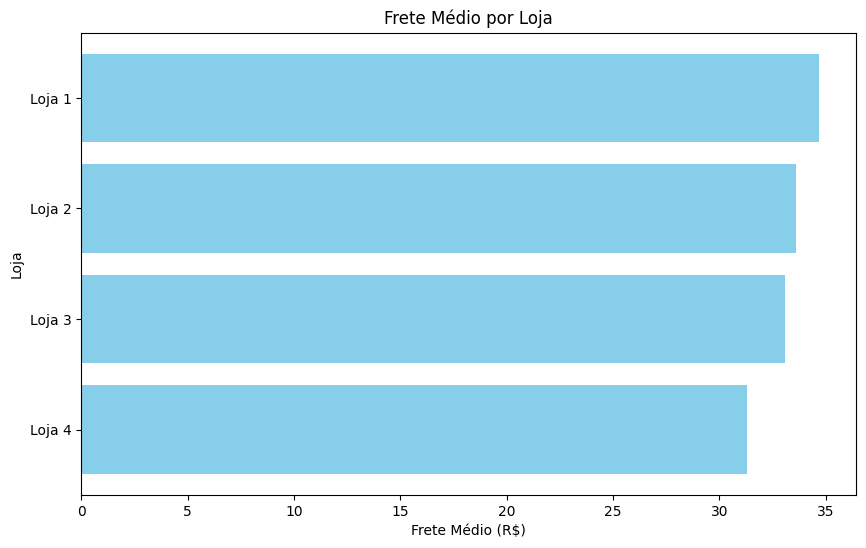

In [ ]:
# prompt: gere um gráfico em formato de barra horizontal demonstrando a média do frete de cada loja, 1 gráfico apenas

# Calcular o frete médio para cada loja
frete_medio_loja1 = loja['Frete'].mean()
frete_medio_loja2 = loja2['Frete'].mean()
frete_medio_loja3 = loja3['Frete'].mean()
frete_medio_loja4 = loja4['Frete'].mean()

# Criar um dataframe com os fretes médios
fretes_medios = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Frete Médio': [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]
})

# Gerar o gráfico de barras horizontal
plt.figure(figsize=(10, 6))
plt.barh(fretes_medios['Loja'], fretes_medios['Frete Médio'], color='skyblue')
plt.xlabel('Frete Médio (R$)')
plt.ylabel('Loja')
plt.title('Frete Médio por Loja')
plt.gca().invert_yaxis() # Inverter o eixo y para ter a Loja 1 no topo
plt.show()